<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team-1/blob/main/Reto/Reto_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maestría en Inteligencia Artificial Aplicada
##Curso: Ciencia y analítica de datos
Tecnológico de Monterrey

Semana 4 - Actividad 1. PCA

Prof Maria de la Paz Rico

Equipo 1

Alumno: Joel Orlando Hernández Ramos

Matrícula: A00759664

Alumno: Rafael Sánchez García

Matrícula: A01182780

Fecha de entrega: Noviembre 16th, 2022


#Parte 1

##Load data


In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import collections
import re
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-team-1/main/Reto/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df_AguaSubterranea = pd.read_csv(path,encoding='cp1252')
df_AguaSubterranea.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


##Clean database

In [3]:
df_AguaSubterranea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

We have 5 columns float type and 51 object type. The total items is 1068

In [4]:
df_AguaSubterranea.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

We have 13 columns with NAs values. So we are going to start cleaning them.

Now lets see how many NAs are per column

In [5]:
df_AguaSubterranea.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [6]:
df_AguaSubterranea.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.61719,25.510285,32.677713
PERIODO,1068.0,2020.000000,0.000000,2020.00000,2020.000000,2020.00000,2020.000000,2020.000000
ALC_mg/L,1064.0,235.633759,116.874291,26.64000,164.000000,215.52750,292.710000,1650.000000
CONDUCT_mS/cm,1062.0,1138.953013,1245.563674,50.40000,501.750000,815.00000,1322.750000,18577.000000
SDT_mg/L,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###PERIODO and SDT_mg/L

We can see that all the values from **PERIODO** is 2020 and **SDT_mg/L** is an empty column. We are considering to drop these 2 columns.



In [7]:
df_AguaSubterranea.drop(['PERIODO','SDT_mg/L'], axis = 1, inplace = True)

###Delete NA's 

Reviewing the data we can see that there are some columns that have 1,2,4 and 6 items with NA's, which in total are 30 items. If them are deleted the data base will end with just 1038 items which is the 97.19% of the data, which is enough to represent the dataset.

In [8]:
df_NAsColumns = df_AguaSubterranea[df_AguaSubterranea.columns[df_AguaSubterranea.isna().any()]]
df_NAsColumns.drop(['CONTAMINANTES'],axis = 1, inplace = True)
df_NAsColumns.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'DUR_mg/L',
       'CALIDAD_DUR', 'N_NO3_mg/L', 'CALIDAD_N_NO3'],
      dtype='object')

In [9]:
df_AguaSubterranea.dropna(subset = df_NAsColumns.columns, axis = 0, inplace = True)
df_AguaSubterranea.isna().sum()

CLAVE                     0
SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
ALC_mg/L                  0
CALIDAD_ALC               0
CONDUCT_mS/cm             0
CALIDAD_CONDUC            0
SDT_M_mg/L                0
CALIDAD_SDT_ra            0
CALIDAD_SDT_salin         0
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  0
CALIDAD_DUR               0
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                0
CALIDAD_N_NO3             0
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L               0
CALIDAD_MN          

Now, the last column that we need to clean is **CONTAMINANTES**. Lets start to see what we have inside it

In [10]:
df_AguaSubterranea['CONTAMINANTES'].unique().tolist()

[nan,
 'FLUO,AS,',
 'NO3,',
 'CF,',
 'CONDUC,NO3,',
 'DT,CF,AS,MN,FE,',
 'CONDUC,SDT_ra,SDT_salin,DT,AS,',
 'AS,',
 'DT,CF,PB,FE,',
 'CONDUC,SDT_ra,SDT_salin,DT,',
 'CONDUC,AS,FE,',
 'CONDUC,',
 'CF,FE,',
 'FE,',
 'DT,NO3,',
 'DT,CR,FE,',
 'CF,FE,NO3,',
 'CONDUC,SDT_ra,SDT_salin,DT,CF,FE,',
 'CONDUC,SDT_ra,SDT_salin,DT,FE,',
 'CONDUC,DT,',
 'CONDUC,SDT_ra,SDT_salin,DT,CF,NO3,',
 'CONDUC,SDT_ra,SDT_salin,DT,FE,NO3,',
 'CONDUC,DT,CF,',
 'FLUO,CF,',
 'DT,',
 'FLUO,',
 'FLUO,DT,',
 'CONDUC,SDT_ra,SDT_salin,FLUO,',
 'CR,FE,',
 'ALC,',
 'SDT_ra,SDT_salin,DT,MN,FE,',
 'FLUO,FE,',
 'FLUO,CF,AS,',
 'DT,FE,',
 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,NO3,',
 'CONDUC,SDT_ra,SDT_salin,DT,AS,NO3,',
 'FLUO,DT,AS,',
 'FLUO,CF,AS,FE,',
 'FE,NO3,',
 'ALC,FLUO,',
 'ALC,CONDUC,SDT_ra,SDT_salin,DT,FE,NO3,',
 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,',
 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,NO3,',
 'CONDUC,SDT_ra,SDT_salin,DT,CF,',
 'CONDUC,SDT_ra,SDT_salin,DT,NO3,',
 'CR,',
 'CONDUC,DT,FE,',
 'ALC,CONDUC,DT,',
 'CONDUC,DT,

To explain more in detail this column we can see that it has all the contaminants that are present in the water. So if one of the items does not have a value or is a NA, this is mean that the water is cleaned, so to avoid to have NA's in the database we can replace it with a phrase **UNCONTAMINATED**

In [11]:
df_AguaSubterranea['CONTAMINANTES'].fillna('NINGUNO', inplace=True)
df_AguaSubterranea.isna().values.any()

False

The database does not have any NAs values. Lets start exploring the columns

###Clean mg/L Columns

In [12]:
def dataframeAnalsys(columnName):
  print("\n",columnName)
  print("Type ",df_AguaSubterranea[columnName].dtypes)
  print("String Values")
  print(df_AguaSubterranea[columnName][pd.to_numeric(df_AguaSubterranea[columnName], errors='coerce').isnull()].unique())

In [13]:
def convertStringToValues_ignoringNulls(columnName):
  print("\n",columnName)
  print("Converting dataframe to float...")
  df_AguaSubterranea[columnName] = df_AguaSubterranea[columnName].astype(float, errors='ignore')
  print("String Values remaining:")
  print(df_AguaSubterranea[columnName][pd.to_numeric(df_AguaSubterranea[columnName], errors='coerce').isnull()].unique().tolist())

In [14]:
def convertStringToValues(columnName, stringValue, numericValue):
  print("\nReplacing values...")
  df_AguaSubterranea.loc[ df_AguaSubterranea[columnName] == stringValue, columnName] = numericValue
  print("Converting dataframe to float...")
  df_AguaSubterranea[columnName] = df_AguaSubterranea[columnName].astype(float, errors='ignore')
  print("Type: " , df_AguaSubterranea[columnName].dtypes)


In [15]:
listmgL = ['AS_TOT_mg/L','CD_TOT_mg/L','COLI_FEC_NMP/100_mL','CR_TOT_mg/L','DUR_mg/L','FE_TOT_mg/L','FLUORUROS_mg/L','HG_TOT_mg/L','MN_TOT_mg/L','N_NO3_mg/L','PB_TOT_mg/L','SDT_M_mg/L']

In [16]:
for x in listmgL:
  dataframeAnalsys(x)


 AS_TOT_mg/L
Type  object
String Values
['<0.01']

 CD_TOT_mg/L
Type  object
String Values
['<0.003']

 COLI_FEC_NMP/100_mL
Type  object
String Values
['<1.1']

 CR_TOT_mg/L
Type  object
String Values
['<0.005']

 DUR_mg/L
Type  object
String Values
['<20']

 FE_TOT_mg/L
Type  object
String Values
['<0.025']

 FLUORUROS_mg/L
Type  object
String Values
['<0.2']

 HG_TOT_mg/L
Type  object
String Values
['<0.0005']

 MN_TOT_mg/L
Type  object
String Values
['<0.0015']

 N_NO3_mg/L
Type  object
String Values
['<0.02']

 PB_TOT_mg/L
Type  object
String Values
['<0.005']

 SDT_M_mg/L
Type  object
String Values
[]


First lets convert the string numeric values to float


In [17]:
for x in listmgL:
  convertStringToValues_ignoringNulls(x)


 AS_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.01']

 CD_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.003']

 COLI_FEC_NMP/100_mL
Converting dataframe to float...
String Values remaining:
['<1.1']

 CR_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.005']

 DUR_mg/L
Converting dataframe to float...
String Values remaining:
['<20']

 FE_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.025']

 FLUORUROS_mg/L
Converting dataframe to float...
String Values remaining:
['<0.2']

 HG_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.0005']

 MN_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.0015']

 N_NO3_mg/L
Converting dataframe to float...
String Values remaining:
['<0.02']

 PB_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.005']

 SDT_M_mg/L
Converting dataframe to float...
String Values remaining:
[]


####AS_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.01'], so we are going to replace with 0.01 But first lets convert the numeric values to float

In [18]:
convertStringToValues('AS_TOT_mg/L','<0.01',0.01)


Replacing values...
Converting dataframe to float...
Type:  float64


####CD_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.003'], so we are going to replace with 0.003 But first lets convert the numeric values to float

In [19]:
convertStringToValues('CD_TOT_mg/L','<0.003',0.003)


Replacing values...
Converting dataframe to float...
Type:  float64


####COLI_FEC_NMP/100_mL

We can see that most of the values are numeric however we have string values like ['<1.1'], so we are going to replace with 1.1 But first lets convert the numeric values to float

In [20]:
convertStringToValues('COLI_FEC_NMP/100_mL','<1.1',1.1)


Replacing values...
Converting dataframe to float...
Type:  float64


####CR_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.005'], so we are going to replace with 0.005 But first lets convert the numeric values to float

In [21]:
convertStringToValues('CR_TOT_mg/L','<0.005',0.005)


Replacing values...
Converting dataframe to float...
Type:  float64


####DUR_mg/L

We can see that most of the values are numeric however we have string values like ['<20'], so we are going to replace with 20

In [22]:
convertStringToValues('DUR_mg/L','<20',20)


Replacing values...
Converting dataframe to float...
Type:  float64


####FE_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.025'], so we are going to replace with 0.025

In [23]:
convertStringToValues('FE_TOT_mg/L','<0.025',0.025)


Replacing values...
Converting dataframe to float...
Type:  float64


####FLUORUROS_mg/L

We can see that most of the values are numeric however we have string values like ['<0.2'], so we are going to replace with 0.2

In [24]:
convertStringToValues('FLUORUROS_mg/L','<0.2',0.2)


Replacing values...
Converting dataframe to float...
Type:  float64


####HG_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.0005'], so we are going to replace with 0.0005 But first lets convert the numeric values to float

In [25]:
convertStringToValues('HG_TOT_mg/L','<0.0005',0.0005)


Replacing values...
Converting dataframe to float...
Type:  float64


####MN_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.0015'], so we are going to replace with 0.0015 But first lets convert the numeric values to float

In [26]:
convertStringToValues('MN_TOT_mg/L','<0.0015',0.0015)


Replacing values...
Converting dataframe to float...
Type:  float64


####N_NO3_mg/L

We can see that most of the values are numeric however we have string values like ['<0.02'], so we are going to replace with 0.02 But first lets convert the numeric values to float

In [27]:
convertStringToValues('N_NO3_mg/L','<0.02',0.02)


Replacing values...
Converting dataframe to float...
Type:  float64


####PB_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.005'], so we are going to replace with 0.005 But first lets convert the numeric values to float

In [28]:
convertStringToValues('PB_TOT_mg/L','<0.005',0.005)


Replacing values...
Converting dataframe to float...
Type:  float64


In [29]:
df_AguaSubterranea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1054 non-null   object 
 1   SITIO                 1054 non-null   object 
 2   ORGANISMO_DE_CUENCA   1054 non-null   object 
 3   ESTADO                1054 non-null   object 
 4   MUNICIPIO             1054 non-null   object 
 5   ACUIFERO              1054 non-null   object 
 6   SUBTIPO               1054 non-null   object 
 7   LONGITUD              1054 non-null   float64
 8   LATITUD               1054 non-null   float64
 9   ALC_mg/L              1054 non-null   float64
 10  CALIDAD_ALC           1054 non-null   object 
 11  CONDUCT_mS/cm         1054 non-null   float64
 12  CALIDAD_CONDUC        1054 non-null   object 
 13  SDT_M_mg/L            1054 non-null   float64
 14  CALIDAD_SDT_ra        1054 non-null   object 
 15  CALIDAD_SDT_salin    

###Continue Cleaning

In [30]:
#Caterogoricals
categoricas = ['CALIDAD_CONDUC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']
#Numericals 
numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

Lets review if the categorical values make sense

In [31]:
for x in categoricas:
  print("\n",x)
  print(df_AguaSubterranea[x].unique().tolist())



 CALIDAD_CONDUC
['Permisible para riego', 'Buena para riego', 'Dudosa para riego', 'Indeseable para riego', 'Excelente para riego']

 CALIDAD_CONDUC
['Permisible para riego', 'Buena para riego', 'Dudosa para riego', 'Indeseable para riego', 'Excelente para riego']

 CALIDAD_SDT_ra
['Cultivos sensibles', 'Excelente para riego', 'Cultivos con manejo especial', 'Cultivos tolerantes', 'Indeseable para riego']

 CALIDAD_SDT_salin
['Potable - Dulce', 'Ligeramente salobres', 'Salobres', 'Salinas']

 CALIDAD_DUR
['Potable - Dura', 'Muy dura e indeseable usos industrial y domestico', 'Potable - Moderadamente suave', 'Potable - Suave']

 CALIDAD_COLI_FEC
['Potable - Excelente', 'Aceptable', 'Contaminada', 'Buena calidad', 'Fuertemente contaminada']

 CALIDAD_N_NO3
['Potable - Excelente', 'Potable - Buena calidad', 'No apta como FAAP']

 CALIDAD_AS
['Apta como FAAP', 'No apta como FAAP', 'Potable - Excelente']

 CALIDAD_CD
['Potable - Excelente', 'No apta como FAAP']

 CALIDAD_CR
['Potable - Exc

It seems that all categorical values are correct. So we finish with the clean process

##Data Exploring

In [32]:
df_AguaSubterraneaCleaned = df_AguaSubterranea.copy()
df_AguaSubterraneaCleaned.head()
#maybe we need to drop CLAVE

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [33]:
df_AguaSubterraneaCleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1054.0,-101.848270,6.697568,-116.66425,-105.385170,-102.170665,-98.971268,-86.864120
LATITUD,1054.0,23.161796,3.875005,14.56115,20.224857,22.640705,25.508770,32.677713
ALC_mg/L,1054.0,234.695266,111.147849,26.64000,164.257500,215.825000,292.930000,1650.000000
CONDUCT_mS/cm,1054.0,1142.726471,1248.990617,110.00000,506.000000,820.000000,1328.000000,18577.000000
SDT_M_mg/L,1054.0,896.945797,2765.757924,101.20000,338.050000,551.400000,915.600000,82170.000000
FLUORUROS_mg/L,1054.0,1.078547,1.931204,0.20000,0.269475,0.506950,1.142400,34.803300
DUR_mg/L,1054.0,349.893584,360.960153,20.00000,121.512000,245.994450,455.617200,3810.692200
COLI_FEC_NMP/100_mL,1054.0,359.734156,2065.705773,1.10000,1.100000,1.100000,10.750000,24196.000000
N_NO3_mg/L,1054.0,4.321651,8.378332,0.02000,0.651667,2.082916,5.190385,121.007813
AS_TOT_mg/L,1054.0,0.019504,0.035051,0.01000,0.010000,0.010000,0.010000,0.452200


Lets the histogram from the numeric values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23387e7650>,
      dtype=object)

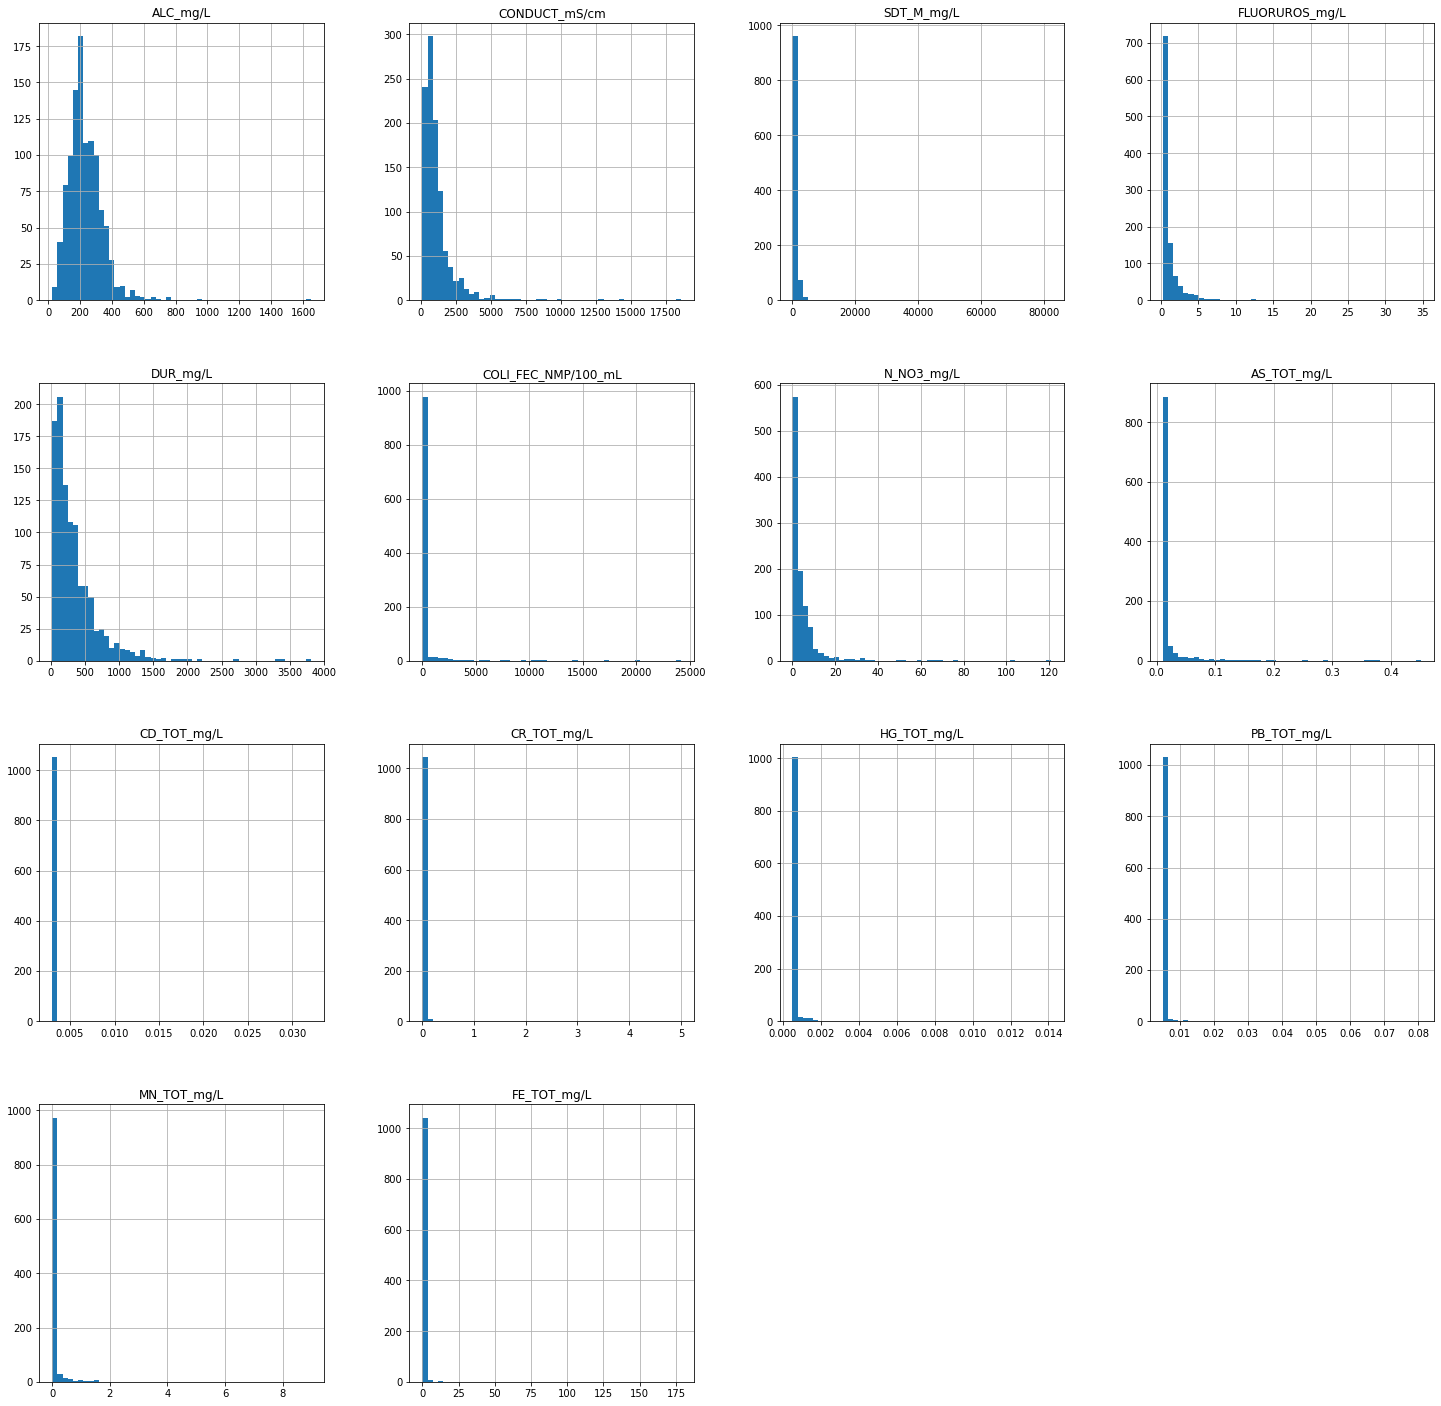

In [34]:
df_AguaSubterraneaCleaned[numericas].hist(bins = 50, figsize=(25,25))

We can see that the data is skewed to the right

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2337a43810>,
      dtype=object)

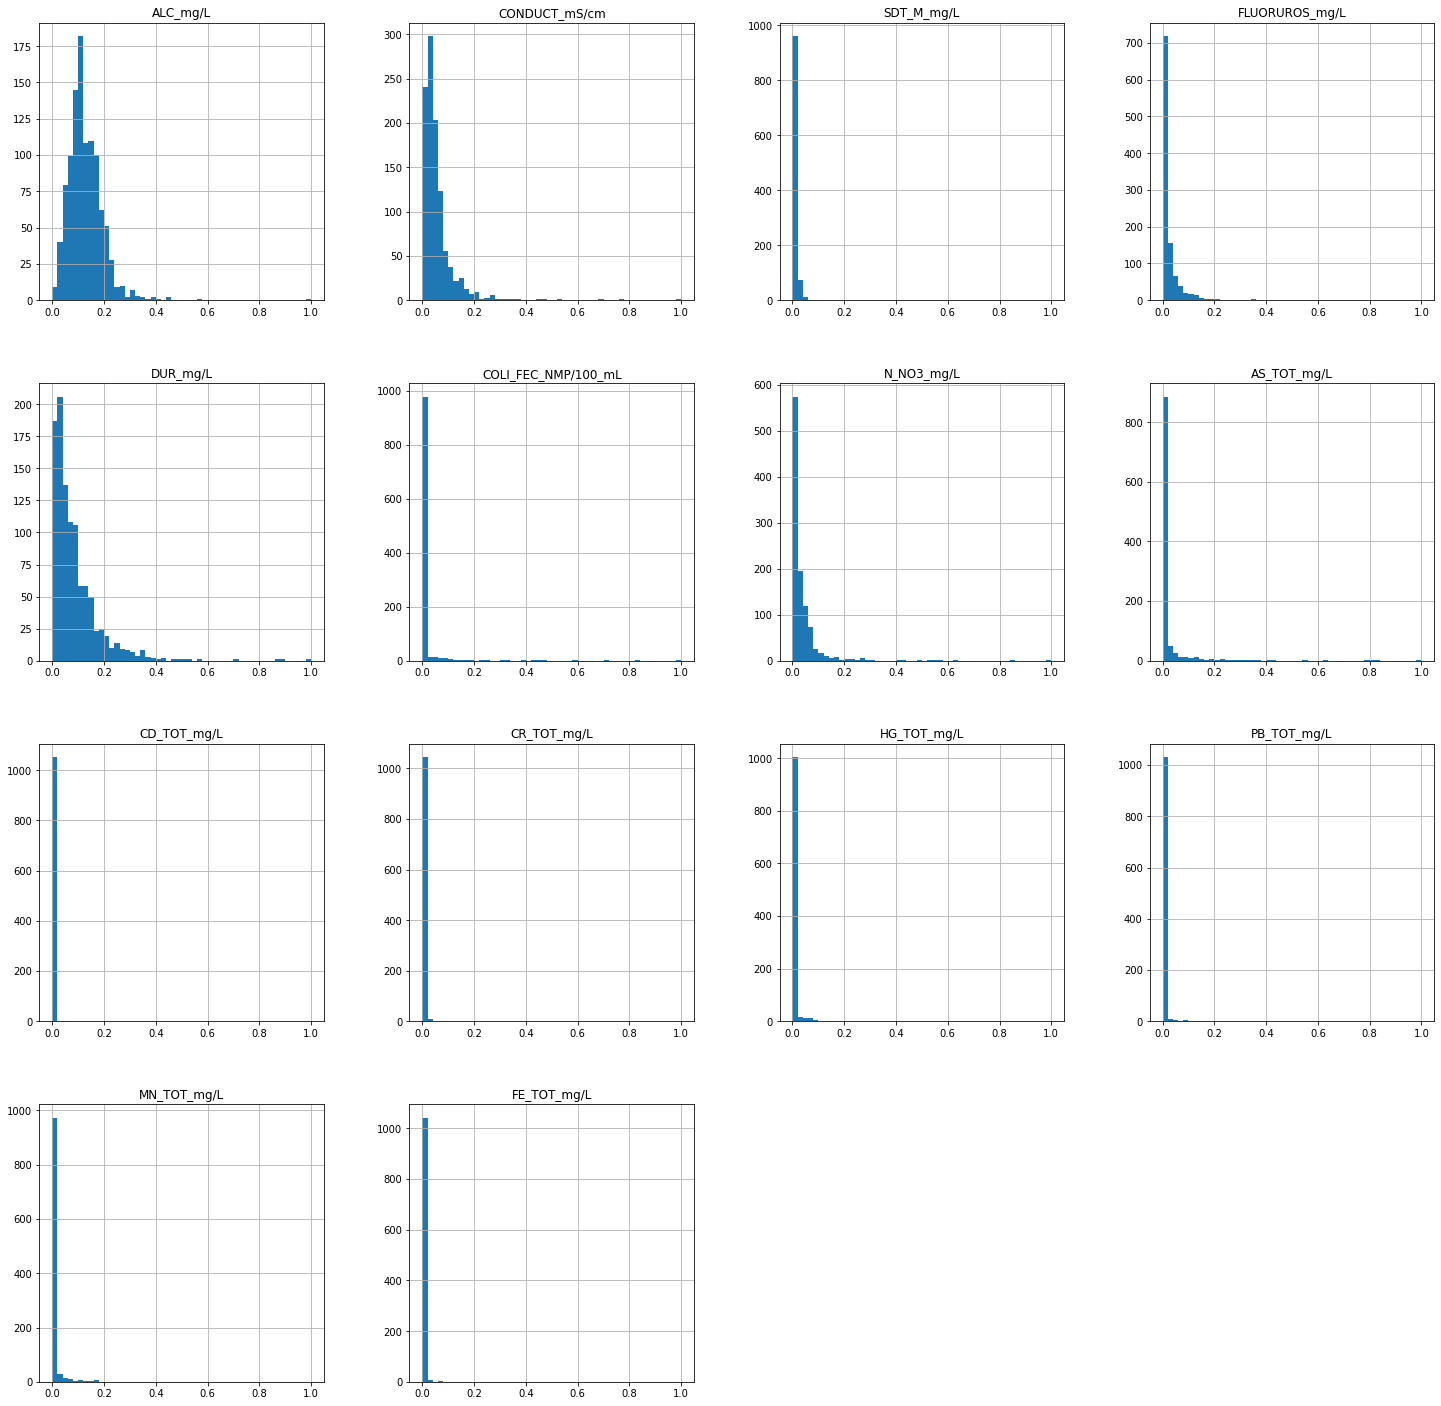

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_AguaSubterraneaCleaned[numericas] = scaler.fit_transform(df_AguaSubterraneaCleaned[numericas])
df_AguaSubterraneaCleaned[numericas].hist(bins = 50, figsize=(25,25))

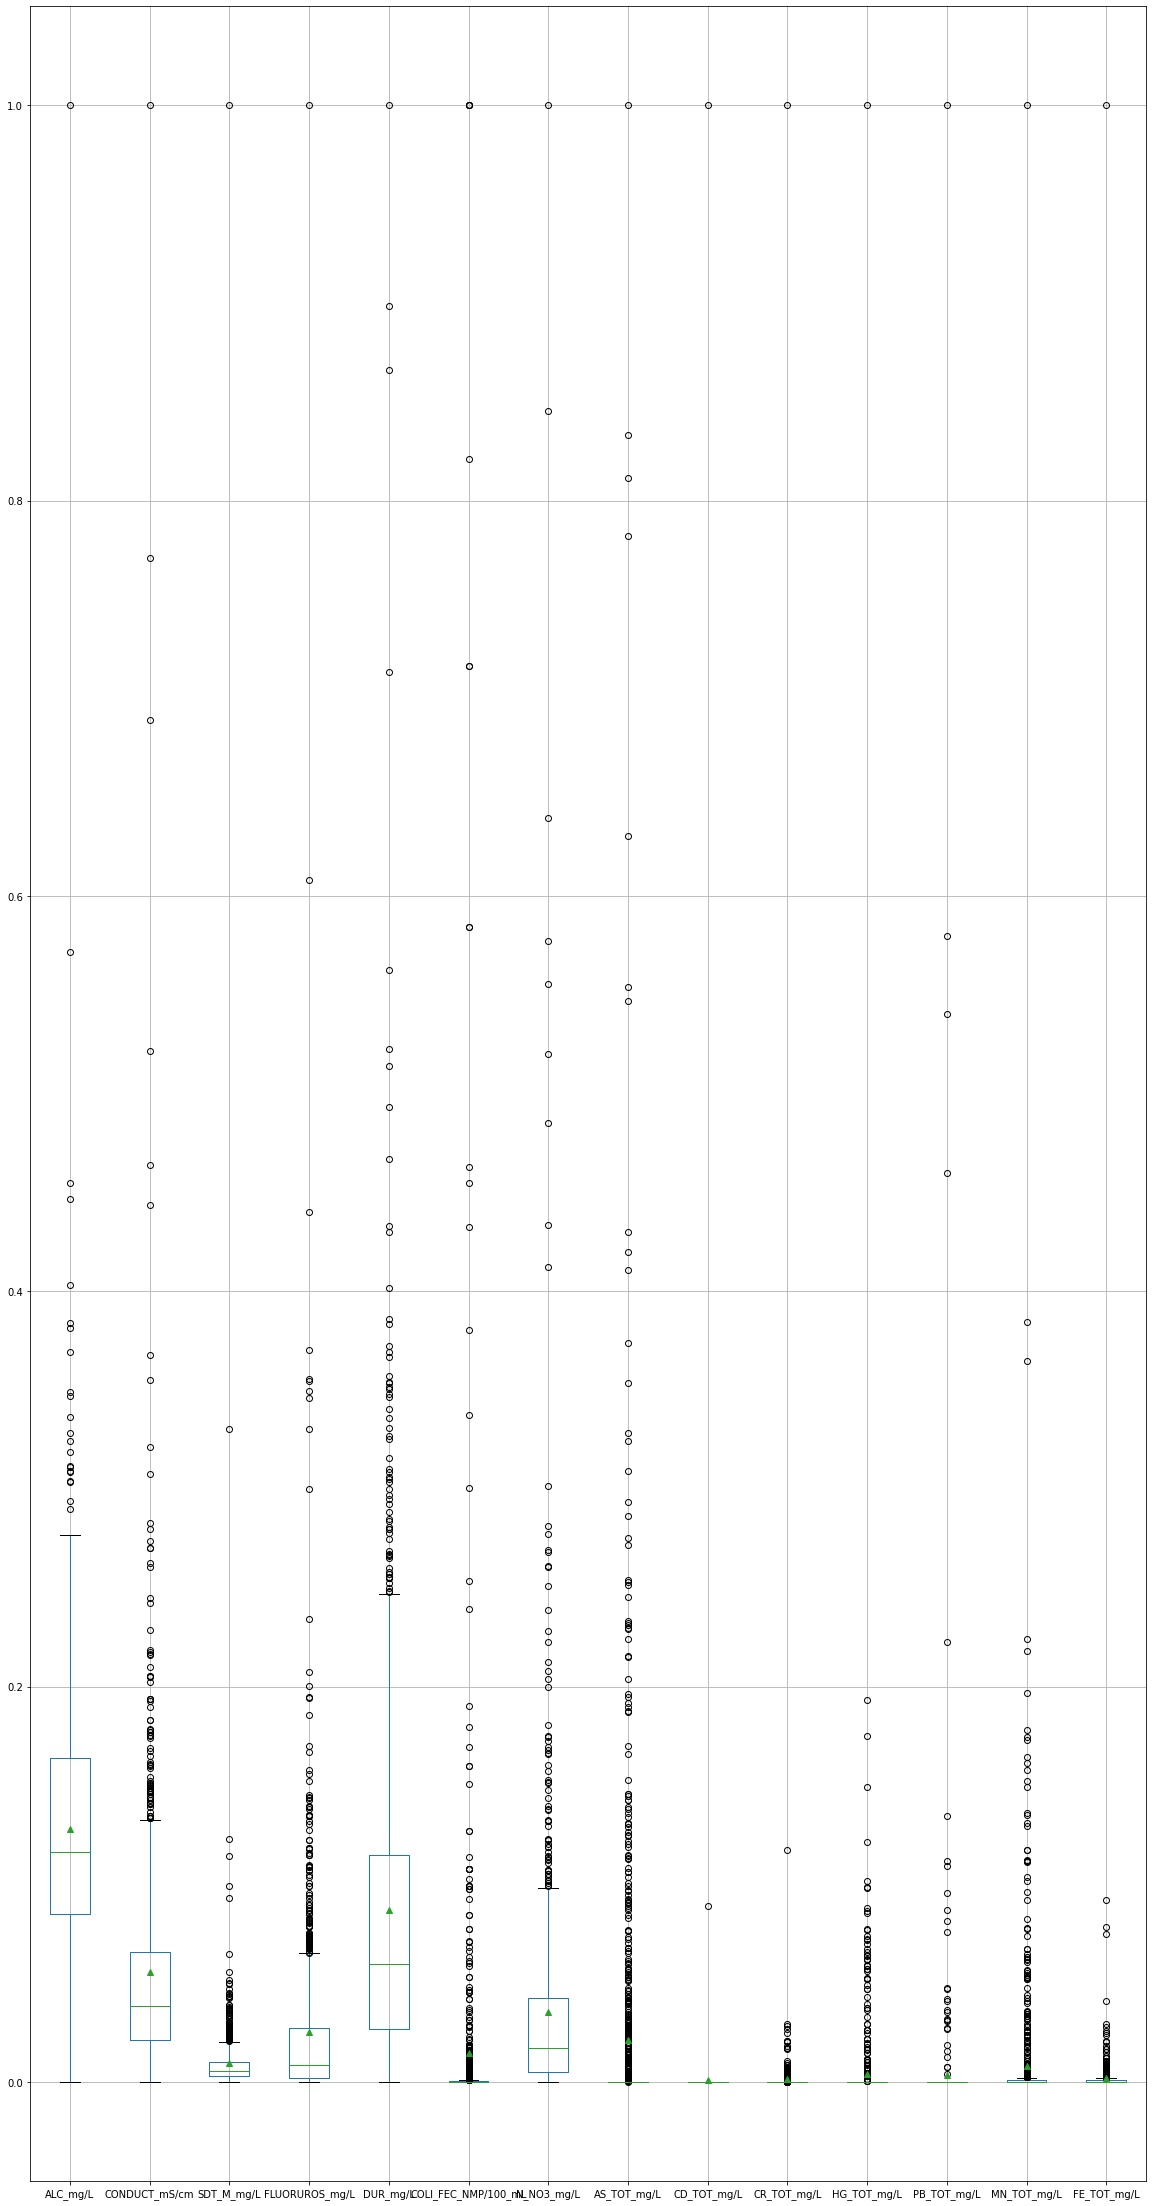

In [36]:
df_AguaSubterraneaCleaned[numericas].boxplot(figsize=(20,40),showmeans=True)

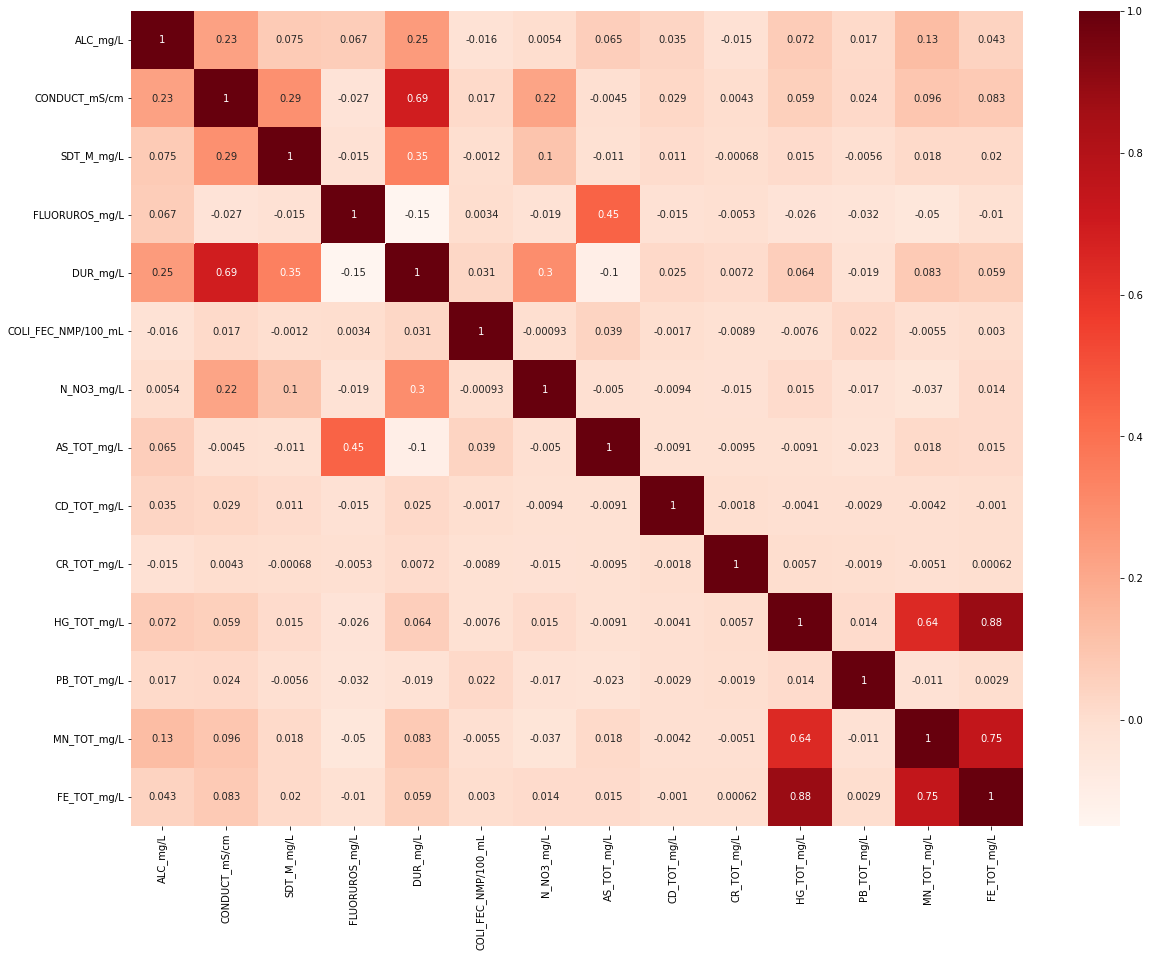

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(df_AguaSubterraneaCleaned[numericas].corr(), annot=True, cmap='Reds')
plt.show()

In [38]:
#df_AguaSubterraneaCleaned['SEMAFORO'][df_AguaSubterraneaCleaned['CUMPLE_CON_CF'] =="NO"].unique()

In [39]:
#df_AguaSubterraneaCleaned.loc[17]